In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from keras import datasets, layers, models


from keras.layers import Dense
from keras import datasets, layers, models
import math

from sklearn.cluster import KMeans
import tensorflow as tf
from keras import layers, datasets, models
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense



In [ ]:
df = pd.read_csv("/content/Train.csv")

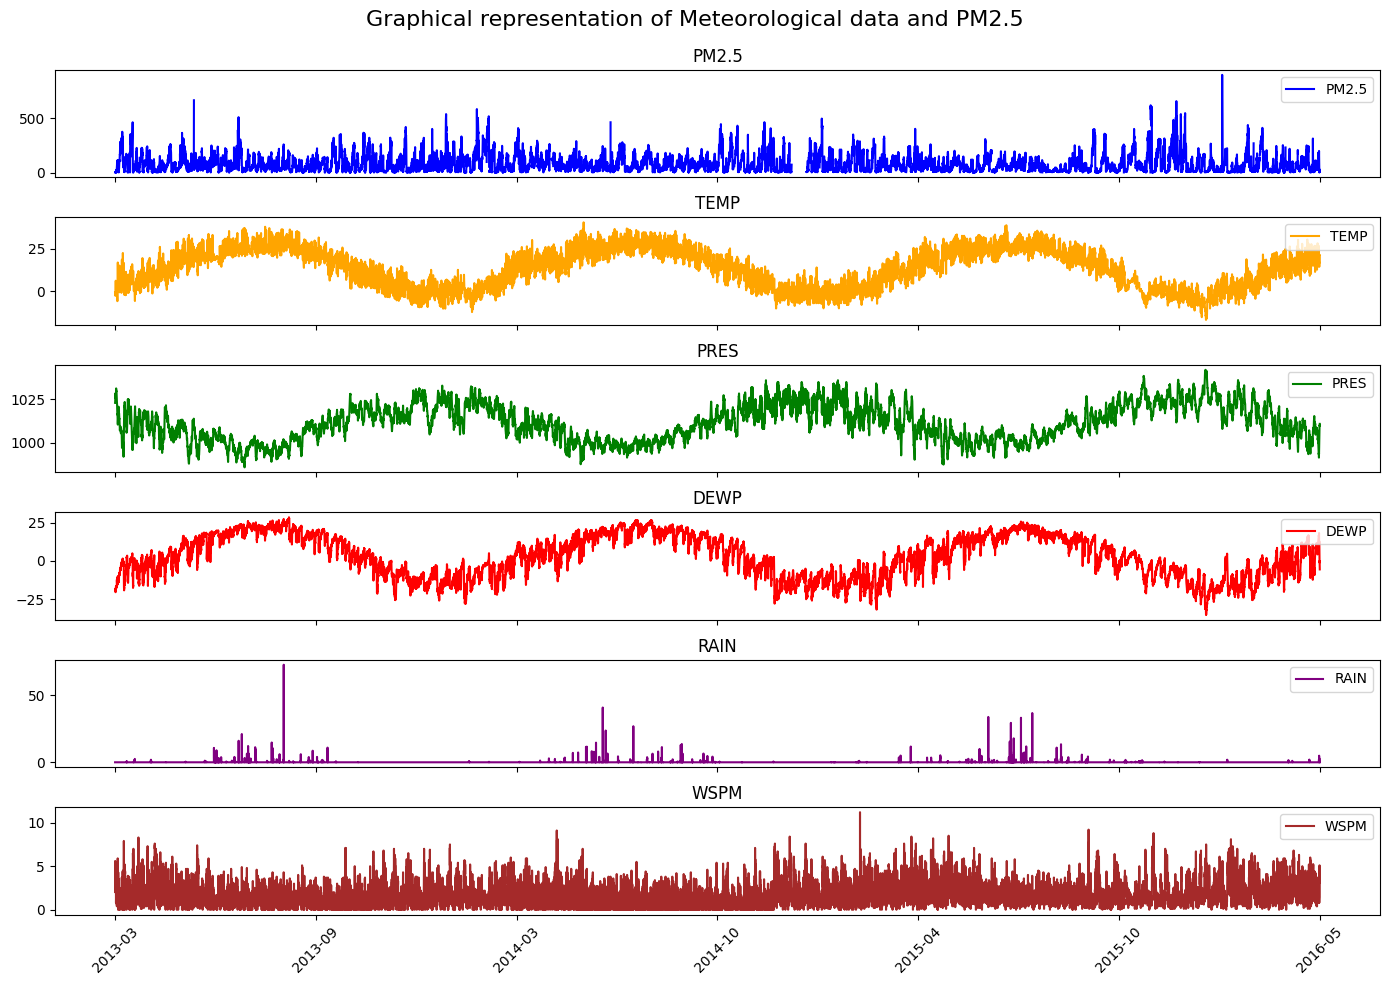

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming 'data' is your DataFrame with the mentioned columns

# Combine the separate date columns into a single datetime column
df['Date'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

# Define the columns you want to plot
columns_to_plot = ['PM2.5', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

# Define the colors for each plot
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']

# Create subplots with shared x-axis (date)
fig, axs = plt.subplots(len(columns_to_plot), 1, figsize=(14, 10), sharex=True)

# Plot each of the columns on a separate subplot
for ax, col, color in zip(axs, columns_to_plot, colors):
    ax.plot(df['Date'], df[col], label=col, color=color)
    ax.set_title(col)
    ax.legend(loc='upper right')

# Rotate the date labels to avoid overlap
plt.setp(axs, xticks=df['Date'][::len(df)//6], xticklabels=df['Date'].dt.strftime('%Y-%m')[::len(df)//6])
plt.xticks(rotation=45)

# Ensure the main title and subplots do not overlap and adjust spacing
plt.tight_layout()
plt.subplots_adjust(top=0.92)

# Add a main title above all subplots
fig.suptitle('Graphical representation of Meteorological data and PM2.5', fontsize=16)


# Show the plot
plt.show()


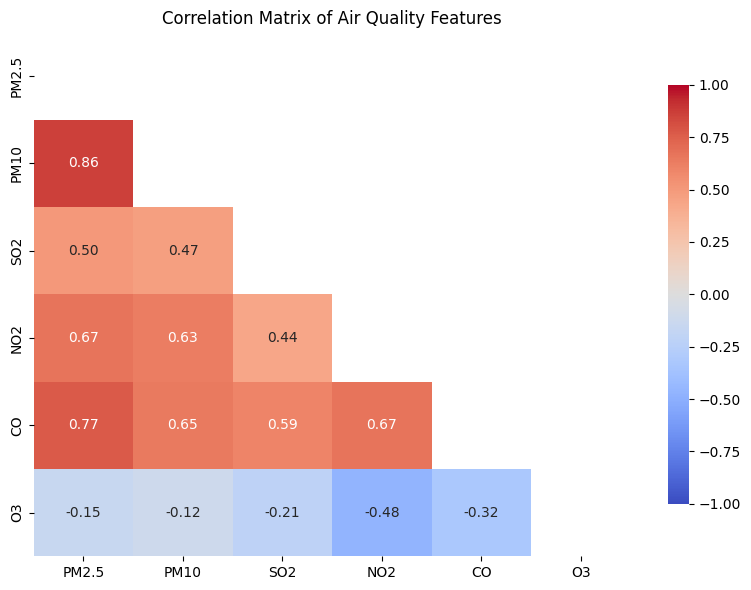

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your pandas DataFrame and it contains the relevant columns
# For example: data = pd.read_csv('your_file.csv')

# Calculate the correlation matrix
corr = df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].corr()

# Create a mask to display only the lower triangle of the matrix
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Draw the heatmap with the mask
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
            vmin=-1, vmax=1, cbar_kws={"shrink": .8})

# Add title
plt.title('Correlation Matrix of Air Quality Features')

# Adjust layout to fit
plt.tight_layout()


# Show the plot
plt.show()


In [ ]:
# df.dropna(subset=['PM2.5'], inplace=True)
features = ['PM2.5', 'TEMP', 'NO2', 'SO2', 'DEWP', 'O3', 'WSPM', 'RAIN']
df.dropna(subset=features, inplace=True)

In [ ]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,Date
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01 00:00:00
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01 01:00:00
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01 02:00:00
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01 03:00:00
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01 04:00:00


In [ ]:
# Assuming 'df' is your DataFrame containing the dataset
# Selecting the specified features: PM2.5, TEMP, NO2, SO2, DEWP, O3, WSPM, RAIN
# Adjust the column indices according to your DataFrame structure
features_columns = ['PM2.5', 'TEMP', 'NO2', 'SO2', 'DEWP', 'O3', 'WSPM', 'RAIN']  # Use the actual column names from your DataFrame

# Select all rows for these features
training_set = df[features_columns].values

# Check the length of the training_set
length_of_training_set = len(training_set)
print(length_of_training_set)


25977


In [ ]:
training_set = training_set[-5000:]

**Feature Scaling**

In [ ]:
# normalize your data for BiGRU
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
lag = 48  # Number of hours to use as input to predict the next hour
n_obs = 5000  # Adjust this if needed based on your dataset size after preprocessing
features = 8  # Total number of features included

X_train = []
y_train = []

# Ensure you're selecting all features for X_train and only the PM2.5 values for y_train
for i in range(lag, n_obs):
    X_train.append(training_set_scaled[i-lag:i, :])  # Include all features in the lagged window
    y_train.append(training_set_scaled[i, 0])  # Assuming PM2.5 is the first feature for prediction

# Convert lists to numpy arrays for training the BiGRU
X_train, y_train = np.array(X_train), np.array(y_train)

# Now, X_train should have the shape [samples, timesteps, features]
print(X_train.shape)  # Expected shape: (number of samples, lag, features)



(4952, 48, 8)


In [ ]:
X_train.shape

(4952, 48, 8)

# **BI GRU**

without tuning hyperparameters

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, GRU, Dropout, Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()

# Adding the first Bidirectional GRU layer with 200 units
model.add(Bidirectional(GRU(units=200, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding a second Bidirectional GRU layer with 100 units
model.add(Bidirectional(GRU(units=100, return_sequences=True)))
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding the third Bidirectional GRU layer with 50 units, return_sequences=True allows stacking another GRU layer
model.add(Bidirectional(GRU(units=50, return_sequences=True)))
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding the last Bidirectional GRU layer with 50 units
# This is the last GRU layer, so return_sequences is not needed
model.add(Bidirectional(GRU(units=50)))
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding the output layer
model.add(Dense(units=1))

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 48, 400)           252000    
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 48, 400)           0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 48, 200)           301200    
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 48, 200)           0         
                                                                 
 bidirectional_2 (Bidirecti  (None, 48, 100)           75600     
 onal)                                                           
                                                        

Fitting the BI GRU to the Training set

In [ ]:
# Compiling the BiGRU
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Fitting
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
155/155 [==============================] - 93s 489ms/step - loss: 0.0060
Epoch 2/50
155/155 [==============================] - 74s 477ms/step - loss: 0.0017
Epoch 3/50
155/155 [==============================] - 74s 477ms/step - loss: 0.0014
Epoch 4/50
155/155 [==============================] - 74s 473ms/step - loss: 0.0013
Epoch 5/50
155/155 [==============================] - 75s 486ms/step - loss: 0.0012
Epoch 6/50
155/155 [==============================] - 75s 485ms/step - loss: 0.0011
Epoch 7/50
155/155 [==============================] - 72s 464ms/step - loss: 0.0011
Epoch 8/50
155/155 [==============================] - 75s 483ms/step - loss: 0.0010
Epoch 9/50
155/155 [==============================] - 74s 475ms/step - loss: 0.0010
Epoch 10/50
155/155 [==============================] - 75s 482ms/step - loss: 9.8372e-04
Epoch 11/50
155/155 [==============================] - 74s 477ms/step - loss: 9.6601e-04
Epoch 12/50
155/155 [==============================] - 82s 529ms/s

Making the predictions and visualising the results

In [ ]:
# Assuming 'sc' is your MinMaxScaler fitted on the training data
# And 'dataset_test' is your raw test dataset loaded from '/content/Test.csv'

# Load the test dataset (already done)
dataset_test = pd.read_csv('/content/Test.csv')

# Drop rows with NaN values in any of the columns you're using
dataset_test.dropna(subset=['PM2.5', 'TEMP', 'NO2', 'SO2', 'DEWP', 'O3', 'WSPM', 'RAIN'], inplace=True)

# Scale the test data using the same scaler as the training data
# Make sure to select the same features in the same order as the training set
test_features = dataset_test[['PM2.5', 'TEMP', 'NO2', 'SO2', 'DEWP', 'O3', 'WSPM', 'RAIN']].values
test_features_scaled = sc.transform(test_features)

# Prepare sequences for testing
X_test = []
for i in range(lag, len(test_features_scaled)):
    X_test.append(test_features_scaled[i-lag:i])  # Use all features

X_test = np.array(X_test)

# Reshape X_test if necessary (it might already be in the correct shape)
# X_test should now be shaped [samples, timesteps, features]
# No need to reshape based on the previous step since it already considers all features

# Make predictions
pred_PM2 = model.predict(X_test)

# Depending on your model's output, you might need to inverse scale the predictions
# If you scaled your target variable (PM2.5) during training


207/207 [==============================] - 30s 126ms/step


In [ ]:
pred_PM2 = model.predict(X_test)
pred_PM2

207/207 [==============================] - 27s 132ms/step


array([[0.0627147 ],
       [0.06170876],
       [0.06110398],
       ...,
       [0.01570462],
       [0.02419956],
       [0.02500865]], dtype=float32)

In [ ]:
# Assume pred_PM2 is your predictions with shape (num_samples, 1)
# Create an array with the same number of columns as the original scaled data
pred_full = np.zeros((pred_PM2.shape[0], 8))  # 8 for the number of features you have

# Assuming PM2.5 is the first column, fill in your predictions there
pred_full[:, 0] = pred_PM2.ravel()  # Use ravel() to ensure it's a 1D array

# Perform the inverse transformation
pred_full_inverse = sc.inverse_transform(pred_full)

# Extract the PM2.5 predictions after inverse transforming
pred_PM2_inverse = pred_full_inverse[:, 0]



In [ ]:
# Assuming dataset_test is your test DataFrame and it's already preprocessed to drop NaNs as before
real_PM2 = dataset_test['PM2.5'].values[-len(pred_PM2):]  # Make sure to align the lengths

# Ensure real_PM2 is properly shaped for comparison
# If necessary, reshape it (though it should already be a 1D array matching pred_PM2_inverse in length)
real_PM2 = real_PM2.reshape(-1, 1)  # Only needed if real_PM2 isn't already a 1D array

# Now proceed with RMSE calculation
RMSE = np.sqrt(np.mean((pred_PM2_inverse - real_PM2.ravel())**2))  # Use ravel() to ensure it's 1D for calculation
print("RMSE:", RMSE)


RMSE: 20.51386910280122


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(real_PM2, pred_PM2_inverse))

# Calculate MAE
mae = mean_absolute_error(real_PM2, pred_PM2_inverse)

# Calculate MSE
mse = mean_squared_error(real_PM2, pred_PM2_inverse)

# Calculate MAPE - Note: You have to ensure real_PM2 does not contain zeros to avoid division by zero
mape = np.mean(np.abs((real_PM2 - pred_PM2_inverse) / real_PM2)) * 100

# Calculate R-squared
r2 = r2_score(real_PM2, pred_PM2_inverse)

# Print the results
print('RMSE: {:.4f}'.format(rmse))
print('MAE: {:.4f}'.format(mae))
print('MSE: {:.4f}'.format(mse))
print('MAPE: {:.4f}%'.format(mape))
print('R-squared: {:.4f}'.format(r2))

RMSE: 20.5139
MAE: 12.9238
MSE: 420.8188
MAPE: 310.2502%
R-squared: 0.9415


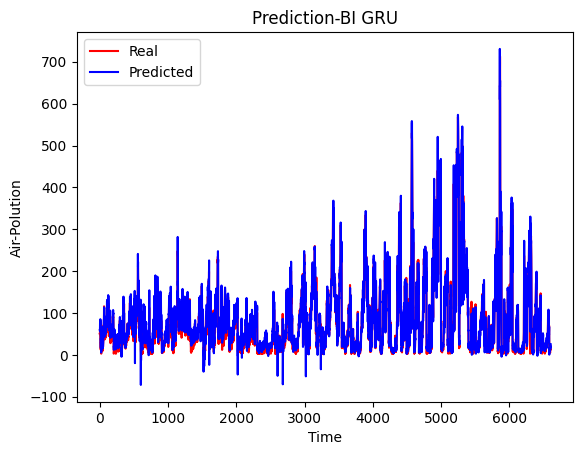

In [ ]:
plt.plot(real_PM2, color = 'red', label = 'Real')
plt.plot(pred_PM2_inverse, color = 'blue', label = 'Predicted')
plt.title('Prediction-BI GRU')
plt.xlabel('Time')
plt.ylabel('Air-Polution')
plt.legend()
plt.show()

**Tunining - Random Search**

In [ ]:
pip install keras-tuner


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, GRU, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from kerastuner import HyperModel, RandomSearch
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the hypermodel
class AirPollutionHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):
        model = Sequential()

        # First Bidirectional GRU layer
        model.add(Bidirectional(
            GRU(units=hp.Int('units_1', min_value=100, max_value=200, step=50),
                return_sequences=True, activation='relu'),
            input_shape=self.input_shape))
        model.add(Dropout(rate=hp.Float('dropout_1', min_value=0.1, max_value=0.3, step=0.1)))

        # Second Bidirectional GRU layer
        model.add(Bidirectional(
            GRU(units=hp.Int('units_2', min_value=50, max_value=150, step=50),
                return_sequences=True, activation='relu')))
        model.add(Dropout(rate=hp.Float('dropout_2', min_value=0.1, max_value=0.3, step=0.1)))

        # Third Bidirectional GRU layer
        model.add(Bidirectional(
            GRU(units=hp.Int('units_3', min_value=30, max_value=100, step=35), activation='relu')))
        model.add(Dropout(rate=hp.Float('dropout_3', min_value=0.1, max_value=0.3, step=0.1)))

        # Output layer
        model.add(Dense(units=1))

        # Compiling the model
        model.compile(optimizer=Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')),
                      loss='mean_squared_error')

        return model

# Assume you have your data prepared in X_train and y_train
# Example input_shape, replace it with actual shape of X_train[1:]
input_shape = (X_train.shape[1], X_train.shape[2])

# Instantiate the hypermodel
hypermodel = AirPollutionHyperModel(input_shape=input_shape)

# Search space configuration
tuner = RandomSearch(
    hypermodel,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=2,
    directory='tuner_results',
    project_name='air_pollution_prediction'
)

# Split your data into training and validation sets
# This is a simple split for demonstration. Consider using more sophisticated methods like time series split.
val_split = int(len(X_train) * 0.8)
X_val, y_val = X_train[val_split:], y_train[val_split:]
X_train, y_train = X_train[:val_split], y_train[:val_split]

# Perform the hyperparameter search
tuner.search(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=32)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"The best hyperparameters are: {best_hps.values}")

# You can now retrieve the best model and train it further, evaluate it or make predictions as required.


Trial 10 Complete [00h 08m 41s]
val_loss: 0.0007269021007232368

Best val_loss So Far: 0.0006555633735843003
Total elapsed time: 01h 27m 26s
The best hyperparameters are: {'units_1': 200, 'dropout_1': 0.1, 'units_2': 100, 'dropout_2': 0.2, 'units_3': 30, 'dropout_3': 0.2, 'learning_rate': 0.005366578343286022}
